In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
stresslvlData = pd.read_csv("/kaggle/input/student-stress-monitoring-datasets/StressLevelDataset.csv")
stressData = pd.read_csv("/kaggle/input/student-stress-monitoring-datasets/Stress_Dataset.csv")

In [3]:
stresslvlData

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,0,14,3,1,3,2,2,2,...,3,2,2,2,3,3,2,3,3,1
1096,9,12,0,8,0,3,0,0,0,1,...,4,0,1,1,1,1,3,4,3,2
1097,4,26,0,3,1,2,5,2,2,3,...,4,5,1,4,1,3,1,2,1,0
1098,21,0,1,19,5,3,1,4,3,1,...,1,2,5,1,4,1,4,4,4,2


In [4]:
stresslvlData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [5]:
stresslvlData.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [6]:
report = pd.DataFrame(index=stresslvlData.columns)
report['dtype'] = stresslvlData.dtypes
report['number of nulls'] = stresslvlData.isnull().sum()
report['ratio of nulls'] = stresslvlData.isnull().sum()/stresslvlData.shape[0]
report['number of uniques'] = stresslvlData.nunique()
report['ratio of uniques'] = stresslvlData.nunique()/stresslvlData.shape[0]
report

,dtype,number of nulls,ratio of nulls,number of uniques,ratio of uniques
anxiety_level,int64,0,0.0,22,0.020000
self_esteem,int64,0,0.0,31,0.028182
mental_health_history,int64,0,0.0,2,0.001818
depression,int64,0,0.0,28,0.025455
headache,int64,0,0.0,6,0.005455
blood_pressure,int64,0,0.0,3,0.002727
sleep_quality,int64,0,0.0,6,0.005455
breathing_problem,int64,0,0.0,6,0.005455
noise_level,int64,0,0.0,6,0.005455
living_conditions,int64,0,0.0,6,0.005455


In [7]:
for i, v in enumerate(stresslvlData.columns.tolist()):
    print (i,v)

0 anxiety_level
1 self_esteem
2 mental_health_history
3 depression
4 headache
5 blood_pressure
6 sleep_quality
7 breathing_problem
8 noise_level
9 living_conditions
10 safety
11 basic_needs
12 academic_performance
13 study_load
14 teacher_student_relationship
15 future_career_concerns
16 social_support
17 peer_pressure
18 extracurricular_activities
19 bullying
20 stress_level


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

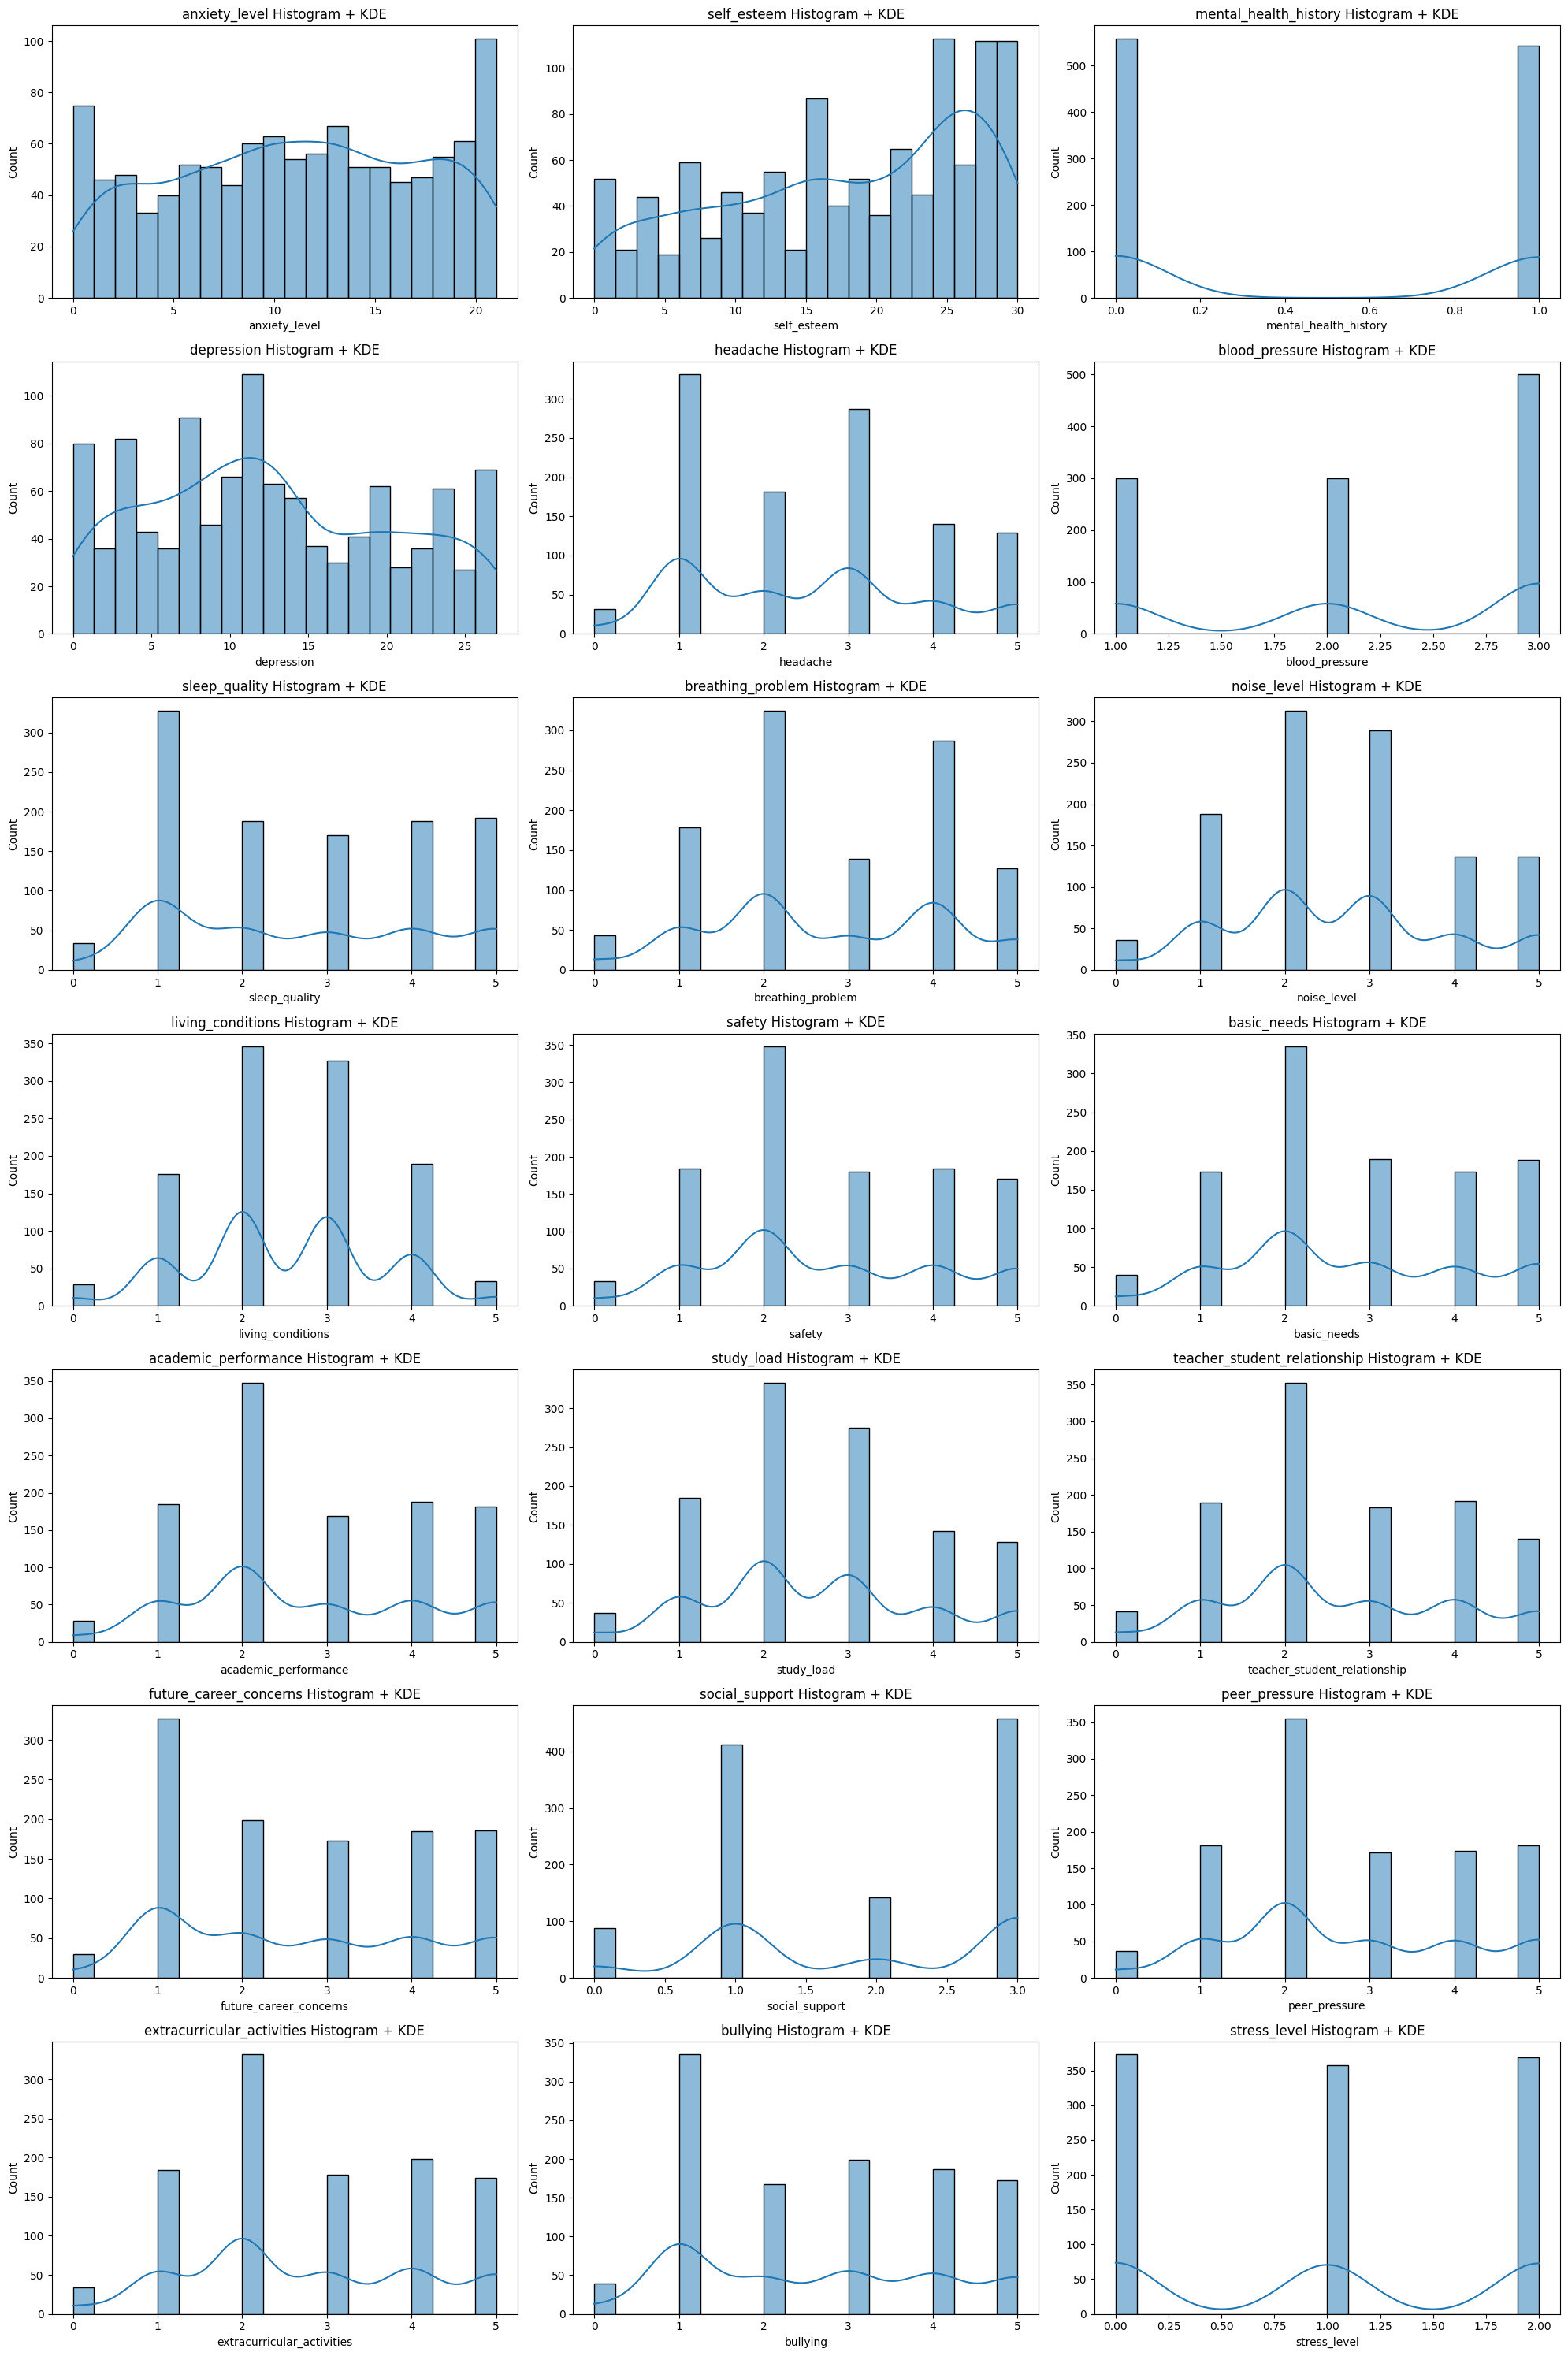

In [8]:
cols = stresslvlData.columns  

n = len(cols)

fig, axs = plt.subplots(7, 3, figsize=(20, 30))

axs = axs.flatten()

for i, col in enumerate(cols):
    sns.histplot(
        data=stresslvlData,
        x=col,
        bins=20,
        kde=True,         
        edgecolor="black",
        ax=axs[i]
    )
    axs[i].set_title(f"{col} Histogram + KDE")

for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()


<Axes: >

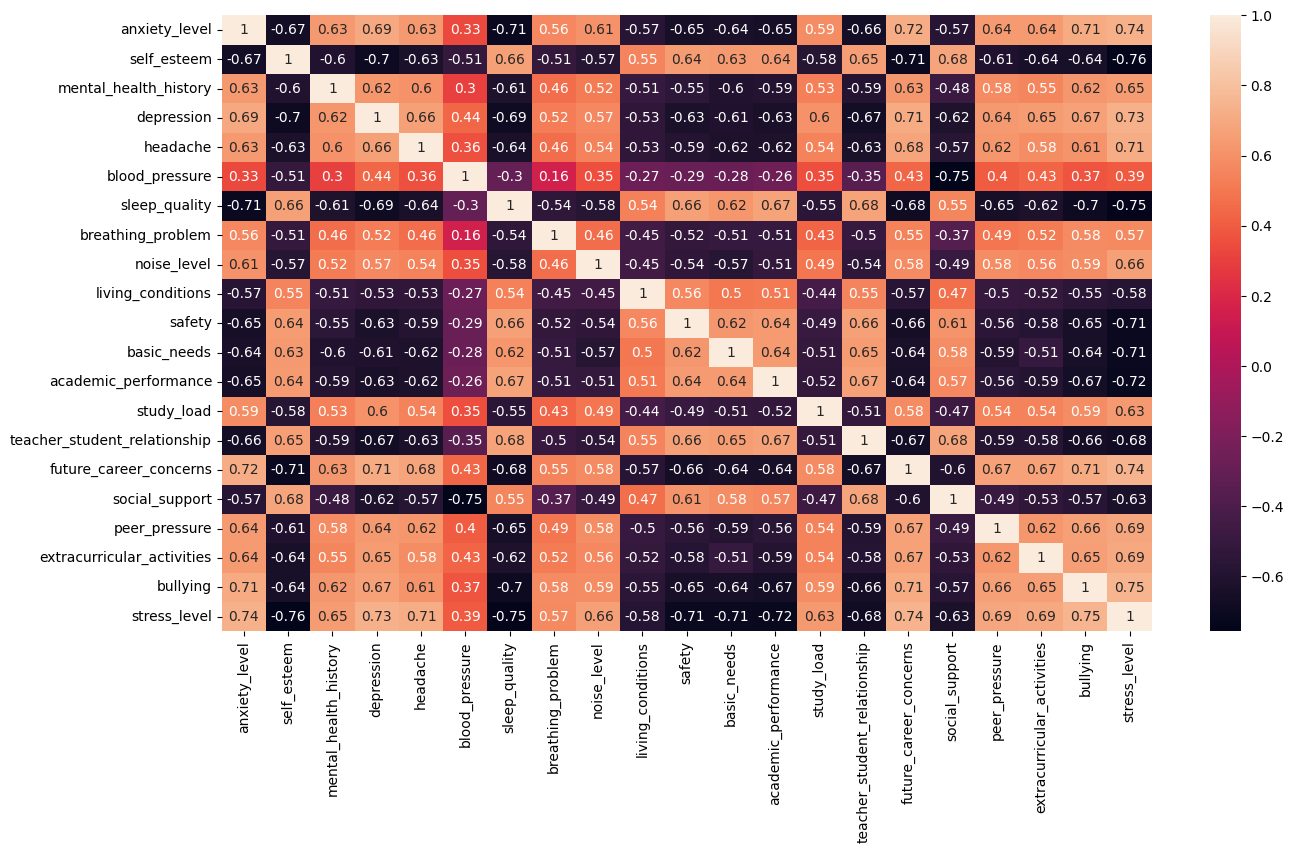

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(stresslvlData.corr(), annot=True)

In [10]:
pd.get_dummies(stresslvlData, columns= [
    "mental_health_history",
    "headache",
    "blood_pressure",
    "sleep_quality",
    "breathing_problem",
    "noise_level",
    "living_conditions",
    "safety",
    "basic_needs",
    "academic_performance",
    "study_load",
    "teacher_student_relationship",
    "future_career_concerns",
    "social_support",
    "peer_pressure",
    "extracurricular_activities",
    "bullying"
], dtype = float)

,anxiety_level,self_esteem,depression,stress_level,mental_health_history_0,mental_health_history_1,headache_0,headache_1,headache_2,headache_3,...,extracurricular_activities_2,extracurricular_activities_3,extracurricular_activities_4,extracurricular_activities_5,bullying_0,bullying_1,bullying_2,bullying_3,bullying_4,bullying_5
0,14,20,11,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,15,8,15,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,12,18,14,1,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,16,12,15,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,16,28,7,1,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,11,17,14,1,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1096,9,12,8,2,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1097,4,26,3,0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1098,21,0,19,2,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [11]:
stresslvlData["stress_level"]

0       1
1       2
2       1
3       2
4       1
       ..
1095    1
1096    2
1097    0
1098    2
1099    2
Name: stress_level, Length: 1100, dtype: int64

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = stresslvlData.drop('stress_level', axis=1)  # all columns except the target
y = stresslvlData['stress_level'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 104)



In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model_lr = make_pipeline(MinMaxScaler(), LogisticRegression())
model_lr.fit(X_train, y_train)           
score_lr = model_lr.score(X_test, y_test)   

In [14]:
from rich import print
print(score_lr)

0.8681818181818182

In [15]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

model_GBC = make_pipeline(MinMaxScaler(), GradientBoostingClassifier(n_estimators=100, max_depth=30))
model_GBC.fit(X_train, y_train)           
score_GBC = model_GBC.score(X_test, y_test)  
print(score_GBC)


model_RF = make_pipeline(MinMaxScaler(), RandomForestClassifier(n_estimators=100, max_depth=30))
model_RF.fit(X_train, y_train)           
score_RF = model_RF.score(X_test, y_test)  
print(score_RF)

0.8818181818181818

0.8545454545454545

In [16]:
from sklearn.linear_model import TweedieRegressor
reg = TweedieRegressor(power=1, alpha=0.5, link='log')

model_twd = make_pipeline(MinMaxScaler(), reg)
model_twd.fit(X_train, y_train)           
score_twd = model_twd.score(X_test, y_test)  
print(score_twd)

0.4645724363667836

In [17]:
from sklearn.linear_model import SGDClassifier
clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)  
print(clf.score(X_test,y_test))

0.8681818181818182

In [18]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(
    iterations=500,       # عدد مرات التكرار
    depth=6,              # عمق الأشجار
    learning_rate=0.05,   # معدل التعلم
    verbose=100           # يطبع كل 100 خطوة
)

piper = make_pipeline(StandardScaler(), model)
piper.fit(X_train,y_train)
print(piper.score(X_test,y_test))

0:	learn: 1.0288196	total: 58.2ms	remaining: 29.1s
100:	learn: 0.1305547	total: 169ms	remaining: 667ms
200:	learn: 0.0745078	total: 277ms	remaining: 412ms
300:	learn: 0.0483572	total: 385ms	remaining: 254ms
400:	learn: 0.0343877	total: 492ms	remaining: 121ms
499:	learn: 0.0260063	total: 599ms	remaining: 0us


0.8681818181818182

In [19]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(max_iter=300).fit(X_train, y_train)
clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8818181818181818